# Part I - Prosper Loan Data Exploration and Analysis
## by (Thiresh Lodaya)

## Introduction
The Dataset contains 113937 loans with 81 characteristics of those loan. The dataset contains many numerical and categorical features to explore on visual assesing on the .csv file.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Set the grid for the output coulmns and rows
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


## Preliminary Wrangling

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [4]:
#shape of the dataframe
loan_df.shape

(113937, 81)

In [5]:
# check for NaN values and data types of the columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

There are column fields with many NaN values and I am only interested in exploring certain features of the dataframe. I would extract only interested features from the dataframe

In [6]:
print('Duplicates in the dataframe:', sum(loan_df.duplicated()))

Duplicates in the dataframe: 0


In [7]:
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
# Index the DataFrame on 'ListingKey' column
loan_df = loan_df.set_index('ListingNumber')

Extracting features necessary to perform the analysis on the datasetr of Loan Data

In [9]:
# List of column names to extract
selected_features = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 
                    'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 
                    'EmploymentStatus', 'DelinquenciesLast7Years', 'StatedMonthlyIncome','TotalProsperLoans', 
                    'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations', 'Investors']

# Create a new DataFrame with the selected columns
df = loan_df[selected_features]

In [10]:
# dataframe with selected features
df.head(3)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
ListingNumber,,,,,,,,,,,,,,,
193129,36,Completed,0.16516,0.158,NaN,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1209647,36,Current,0.12016,0.092,A,7.0,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
81716,36,Completed,0.28269,0.275,NaN,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41


In [11]:
df.shape

(113937, 15)

In [12]:
df.isnull().sum().sort_values(ascending=False)

TotalProsperLoans            91852
ProsperRating (Alpha)        29084
ProsperScore                 29084
EmploymentStatus              2255
DelinquenciesLast7Years        990
BorrowerAPR                     25
Term                             0
LoanStatus                       0
BorrowerRate                     0
ListingCategory (numeric)        0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

In [13]:
# drop NaN values in PorsperRating(Alpha)
df = df.dropna(subset=['ProsperRating (Alpha)'])

In [14]:
# check for NaN values again
df.isnull().sum().sort_values(ascending=False)

TotalProsperLoans            65056
Term                             0
LoanStatus                       0
BorrowerAPR                      0
BorrowerRate                     0
ProsperRating (Alpha)            0
ProsperScore                     0
ListingCategory (numeric)        0
EmploymentStatus                 0
DelinquenciesLast7Years          0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

In [15]:
# convert LoanOriginationDate datatype to DateTime from object
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [16]:
# TotalProsperLoans NaN value to '0'
df['TotalProsperLoans'] = df['TotalProsperLoans'].fillna(0)

In [17]:
# check if there are any more NaN values in the dataframe
df.isnull().sum().sort_values(ascending=False)

Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
EmploymentStatus             0
DelinquenciesLast7Years      0
StatedMonthlyIncome          0
TotalProsperLoans            0
LoanOriginalAmount           0
LoanOriginationDate          0
Recommendations              0
Investors                    0
dtype: int64

In [18]:
df.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000,84853.000000
mean,42.486135,0.226658,0.196022,5.950067,3.312647,3.659435,5.931175e+03,0.340789,9083.440515,0.017560,68.264669
std,11.640346,0.079916,0.074631,2.376501,4.364277,9.347957,8.239944e+03,0.726235,6287.860058,0.187963,95.195831
min,12.000000,0.045830,0.040000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,1.000000
25%,36.000000,0.163280,0.135900,4.000000,1.000000,0.000000,3.434000e+03,0.000000,4000.000000,0.000000,1.000000
50%,36.000000,0.219450,0.187500,6.000000,1.000000,0.000000,5.000000e+03,0.000000,7500.000000,0.000000,32.000000
75%,60.000000,0.292540,0.257400,8.000000,3.000000,2.000000,7.083333e+03,0.000000,13500.000000,0.000000,97.000000
max,60.000000,0.423950,0.360000,11.000000,20.000000,99.000000,1.750003e+06,8.000000,35000.000000,19.000000,1189.000000


In [19]:
df.describe(include = [np.object])

C:\Users\QXZ31RV\AppData\Local\Temp\ipykernel_13576\3141432936.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include = [np.object])


,LoanStatus,ProsperRating (Alpha),EmploymentStatus
count,84853,84853,84853
unique,11,7,7
top,Current,C,Employed
freq,56576,18345,67310


In [20]:
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [21]:
df['ProsperRating (Alpha)'] = pd.Categorical(df['ProsperRating (Alpha)'], categories=rating_order, ordered=True)

### What is the structure of your dataset?

The dataset contains 84853 loan listing cleaned from 113937 from data of Proster Company.The dataset contains most numeric data, but also categorial data and datetime object as well.

### What is/are the main feature(s) of interest in your dataset?

I would create a exploration analysis and point out major features default on credit and a good rated loan payee features using numeric and categorical data in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

ProsperRating, LoanAmount, statedIncome, borrowersRate, and Term will be deciding factors for a default.

## Univariate Exploration

In this exploration, each features of importance will be explored using variety of different plot. Assesing those visualizations I would wrangle the dataset if required.

Univariate Exploration contains plots as below:
- Pie Chart
- Histogram (Horizontal, with KDE)
- Box Plot
- Countplot

In [22]:
# setting color
defaultColor = sns.color_palette()[0]

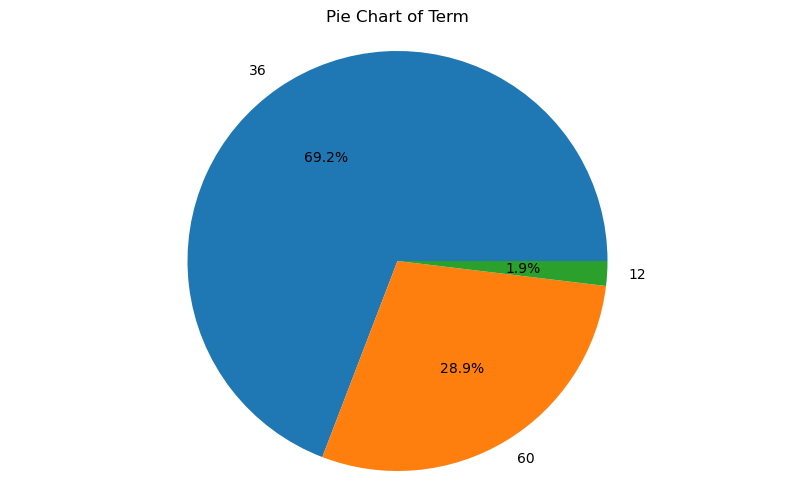

In [23]:
term_counts = df['Term'].value_counts()

# Create a pie chart
plt.figure(figsize=[10, 6])
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', colors=sns.color_palette())
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Term')
plt.show()

Correct order: "'Completed' -> 'Current' -> 'FinalPaymentInProgress' -> 'Past Due (1-15 days)' -> 'Past Due (16-30 days)', 'Past Due (31-60 days)' -> 'Past Due (61-90 days)' -> 'Past Due (91-120 days)' -> 'Past Due (>120 days)' -> 'Defaulted' -> 'Chargedoff'

**Term** has three unique value 60, 36 and 12. Most of values are for 36 term, followed by 60 and the least is 12

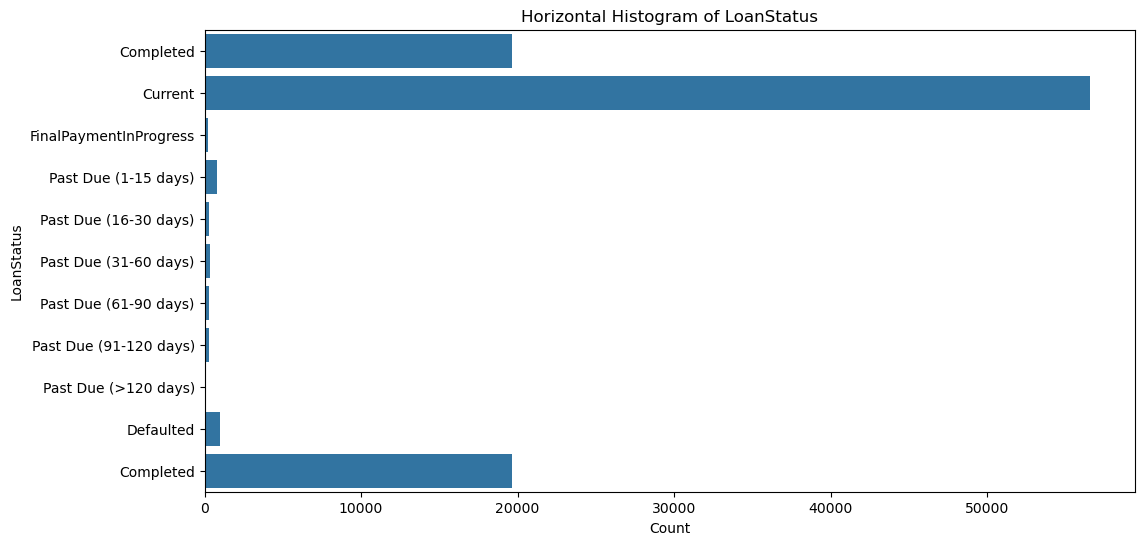

In [24]:
ordered_loanstatus = ['Completed','Current','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Completed']
# 'LoanStatus' categories as horizontal bars 
plt.figure(figsize=[12, 6])
plt.xticks(rotation=0)
sns.countplot(data=df, y='LoanStatus', color=defaultColor, order = ordered_loanstatus)  # Use 'y' and the blue color
plt.xlabel('Count')
plt.ylabel('LoanStatus')
plt.title('Horizontal Histogram of LoanStatus')
plt.show()

In [25]:
df['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

**LoanStatus**: Most of loan status are in current category, followed by Completed, ChargedOff and few with Defaulted

C:\Users\QXZ31RV\AppData\Local\Temp\ipykernel_13576\4261958034.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(borrower_rate_data, kde=True, color=sns.color_palette()[0], ax=axes[0])
C:\Users\QXZ31RV\AppData\Local\Temp\ipykernel_13576\4261958034.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

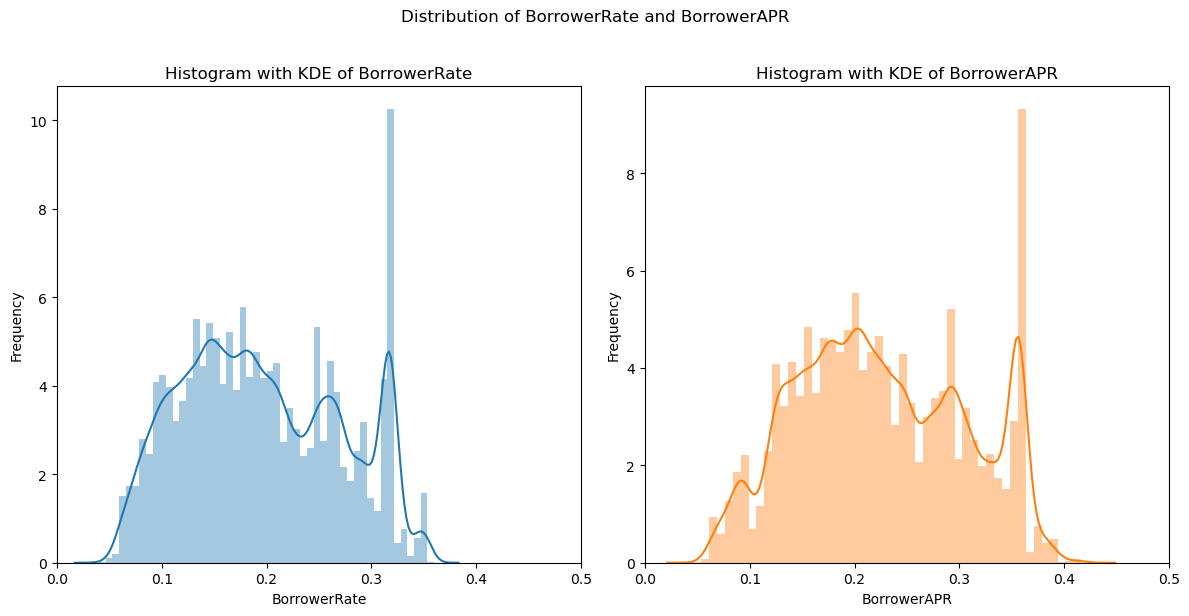

In [26]:
# BorrowerRate and BorrowerAPR data
borrower_rate_data = df['BorrowerRate']
borrower_apr_data = df['BorrowerAPR']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for BorrowerRate
sns.distplot(borrower_rate_data, kde=True, color=sns.color_palette()[0], ax=axes[0])
axes[0].set_xlabel('BorrowerRate')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram with KDE of BorrowerRate')
axes[0].set_xlim([0, 0.5])  # Set the same x-axis limits for both plots

# Plot for BorrowerAPR
sns.distplot(borrower_apr_data, kde=True, color=sns.color_palette()[1], ax=axes[1])
axes[1].set_xlabel('BorrowerAPR')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram with KDE of BorrowerAPR')
axes[1].set_xlim([0, 0.5])  # Set the same x-axis limits for both plots

# Add plot title
plt.suptitle('Distribution of BorrowerRate and BorrowerAPR', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

**BorrowerRate & BorrowerAPR** is a bimodal with peaks at 0.15-0.20 and second phase highest peaks between 0.3-0.35

In [27]:
# checking frequency of bimodal
df.BorrowerRate.value_counts().nlargest(10)

0.3177    3672
0.3199    1645
0.2699    1314
0.1099     932
0.3500     802
0.1585     792
0.2099     760
0.1299     756
0.2599     750
0.2199     729
Name: BorrowerRate, dtype: int64

In [28]:
# checking frequency of bimodal
df.BorrowerAPR.value_counts().nlargest(10)

0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
0.15833     651
0.24246     605
0.24758     601
0.12528     559
0.17359     547
Name: BorrowerAPR, dtype: int64

The most **common frequency** are 0.3177 and 0.3199 for BorrowerRate and 0.3597 and 0.35643 for BorrowerAAPR

In [29]:
def plot_countplot(data, x_col, order=None, color=None, title='', x_label='', y_label='', x_ticks_rotation=0):
    plt.figure(figsize=(10, 6))
    
    if order is not None:
        if isinstance(data[x_col].dtype, pd.CategoricalDtype):
            data[x_col] = pd.Categorical(data[x_col], categories=order, ordered=True)
        else:
            data[x_col] = data[x_col].astype('category', ordered=True, categories=order)
            
    if color is None:
        color = sns.color_palette()[0]
            
    sns.countplot(data=data, x=x_col, order=order, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=x_ticks_rotation)
    plt.show()

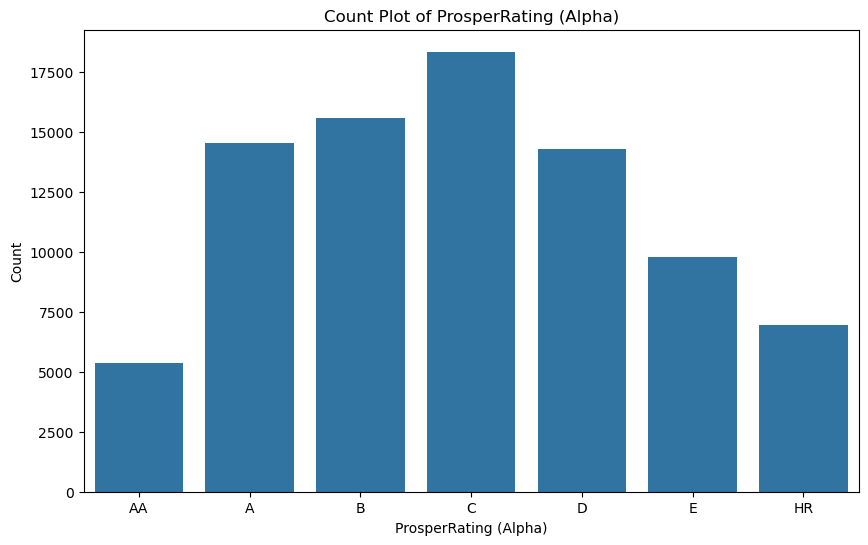

In [30]:
plot_countplot(data=df, x_col='ProsperRating (Alpha)', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
               color=defaultColor, title='Count Plot of ProsperRating (Alpha)',
               x_label='ProsperRating (Alpha)', y_label='Count')

**ProsperRating** seems evenly distributed over all categories of rating with least for 'AA' and 'HR' categories, which are point of interest and most for 'C'

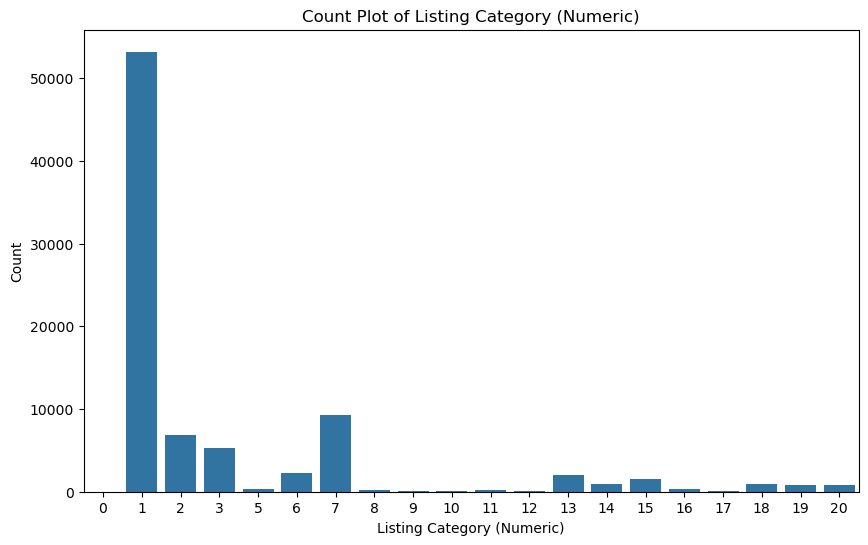

In [31]:
plot_countplot(data=df, x_col='ListingCategory (numeric)', color=defaultColor,
               title='Count Plot of Listing Category (Numeric)',
               x_label='Listing Category (Numeric)', y_label='Count')

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Categoies are taken from Knowledge Page of Udacity: https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html?__cf_chl_captcha_tk__=pmd_JO2ZG9vpjoLbKN83Xf5kUMw6tNq94WfxhWahPmdHtE0-1630232244-0-gqNtZGzNAxCjcnBszQq9

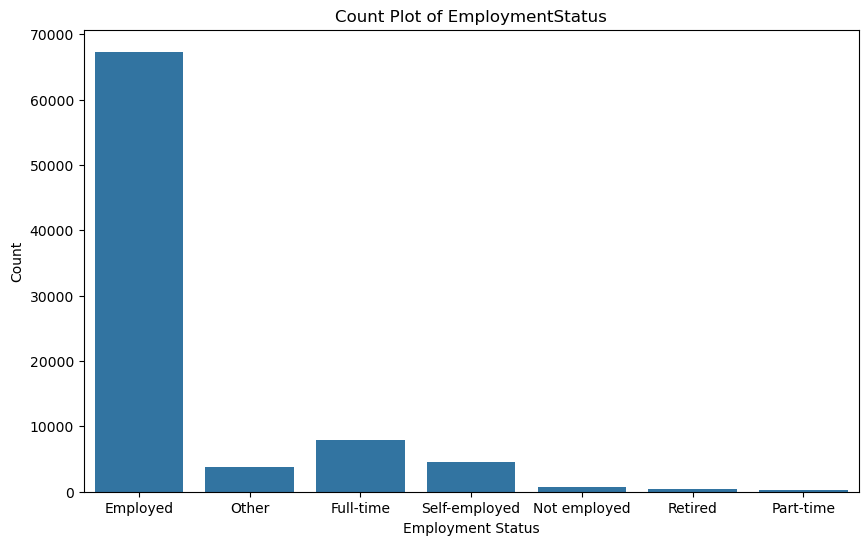

In [32]:
plot_countplot(data=df, x_col='EmploymentStatus', color=defaultColor,
               title='Count Plot of EmploymentStatus',
               x_label='Employment Status', y_label='Count')

**EmploymentStatus** shows most of the borrowers are Employed followed by Full-time status

In [33]:
def plot_histogram(data, column, bins, color, title, x_label, y_label, x_ticks_rotation=0, x_lim=None):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=bins, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=x_ticks_rotation)
    if x_lim:
        plt.xlim(x_lim)
    plt.show()

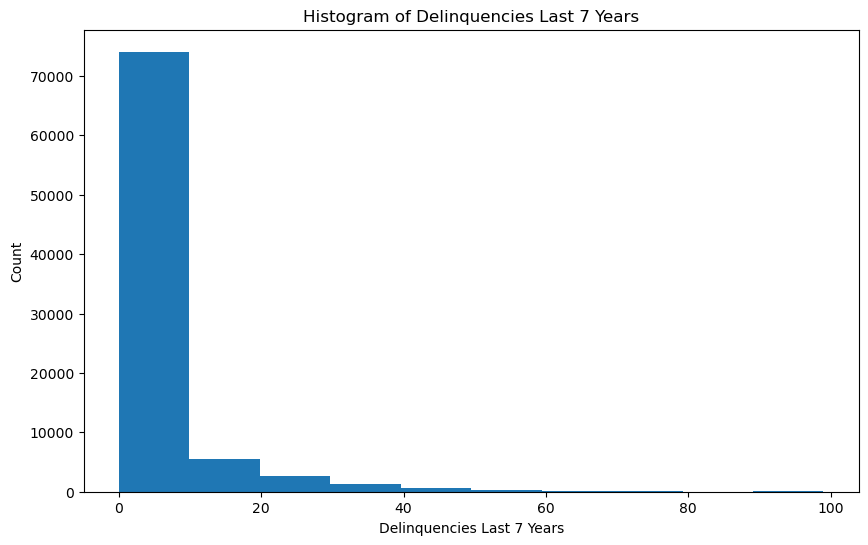

In [34]:
plot_histogram(data=df, column='DelinquenciesLast7Years', bins=10, color=defaultColor,
               title='Histogram of Delinquencies Last 7 Years',
               x_label='Delinquencies Last 7 Years', y_label='Count')


**DelinquenciesLast7Years** 
Most borrowers from Prosper Company have '0' delinquencies and only small number of borrowers have delinquencies more than 20(interesting information)

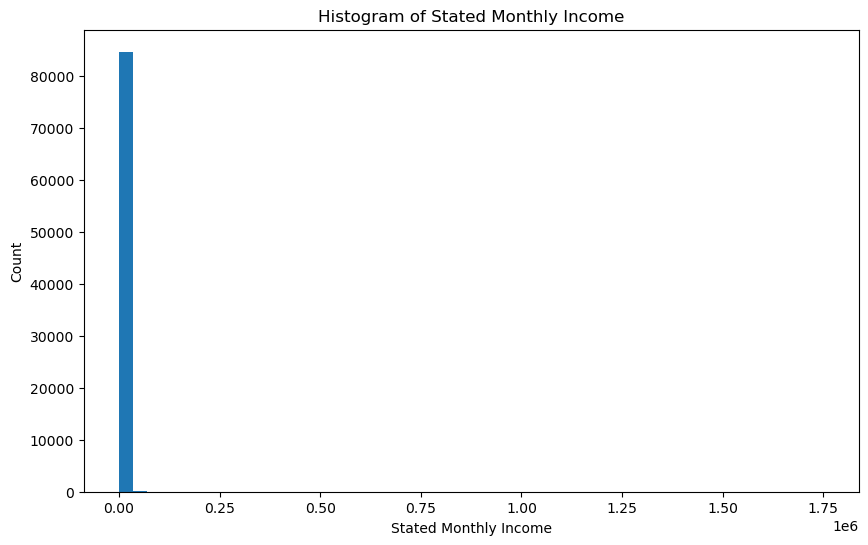

In [35]:
plot_histogram(data=df, column='StatedMonthlyIncome', bins=50, color=defaultColor,
               title='Histogram of Stated Monthly Income',
               x_label='Stated Monthly Income', y_label='Count')


**StatedMonthlyIncome** is right-skewed and needs inspection of outliers.
Common approach to identify outliers is **z-score**

In [36]:
def find_outliers(data_frame, column_name, z_score_threshold=3):
    """
    Find outliers in a DataFrame column using z-scores.

    Parameters:
    data_frame (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to analyze for outliers.
    z_score_threshold (float, optional): The z-score threshold for defining outliers. Default is 3.

    Returns:
    pd.DataFrame: A DataFrame containing the outliers in the specified column.
    """
    # Calculate the z-scores for the specified column
    z_scores = np.abs((data_frame[column_name] - data_frame[column_name].mean()) / data_frame[column_name].std())

    # Calculate the boundary for outliers
    boundary = data_frame[column_name].mean() + z_score_threshold * data_frame[column_name].std()

    # Get the outliers from the DataFrame
    outliers = data_frame[data_frame[column_name] >= boundary]

    return outliers,boundary


outliers_df, boundary = find_outliers(df, 'StatedMonthlyIncome', z_score_threshold=3)
print("Number of outliers:", outliers_df.shape[0])

Number of outliers: 245


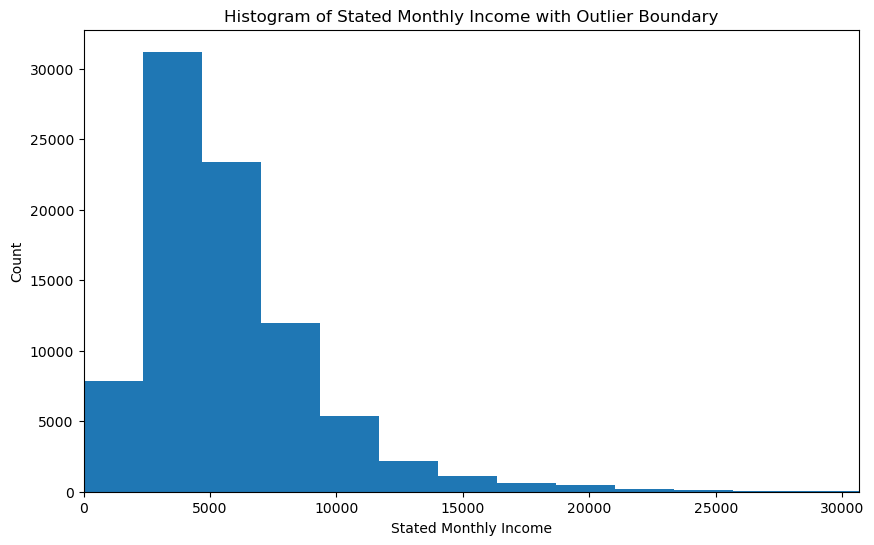

In [37]:
plot_histogram(data=df, column='StatedMonthlyIncome', bins=750, color=defaultColor,
               title='Histogram of Stated Monthly Income with Outlier Boundary',
               x_label='Stated Monthly Income', y_label='Count',
               x_ticks_rotation=0, x_lim=(0, boundary))

**Still stated monthly income is right-skewed**

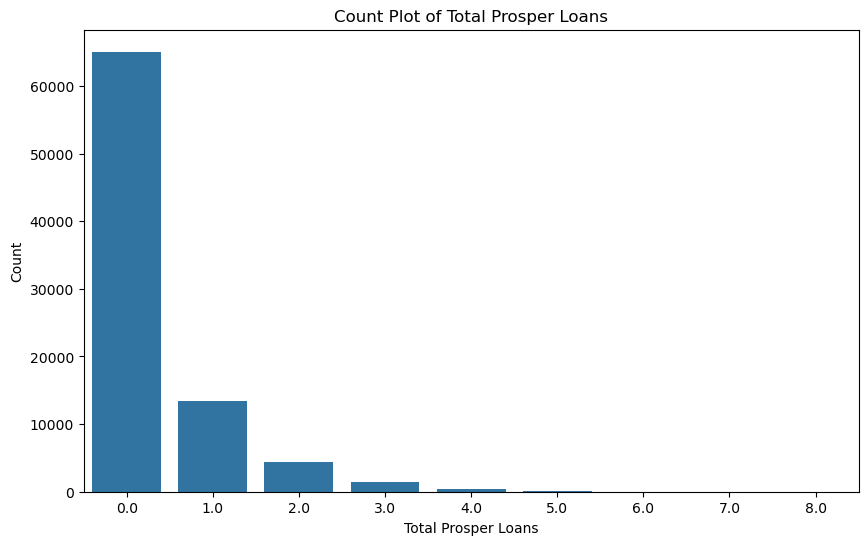

In [38]:
plot_countplot(data=df, x_col='TotalProsperLoans', color=defaultColor,
               title='Count Plot of Total Prosper Loans',
               x_label='Total Prosper Loans', y_label='Count')

**TotalProsperLoans**: Most of loan borrowers are newbies(first-timers) only minority of loan borrowers from Prosper Company have previous record of loan borrowing.

**LoanOriginalAmount**: Most loans amount are less than 15000

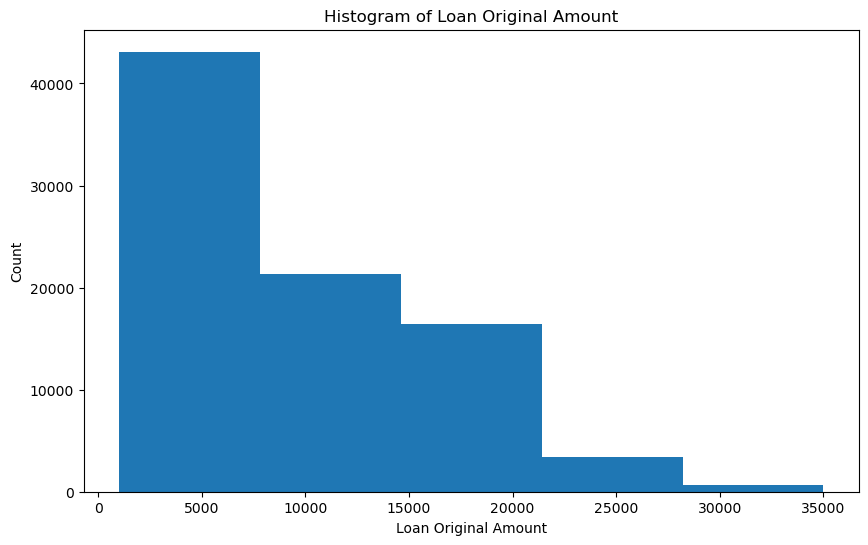

In [39]:
plot_histogram(data=df, column='LoanOriginalAmount', bins=5, color=defaultColor,
               title='Histogram of Loan Original Amount',
               x_label='Loan Original Amount', y_label='Count')

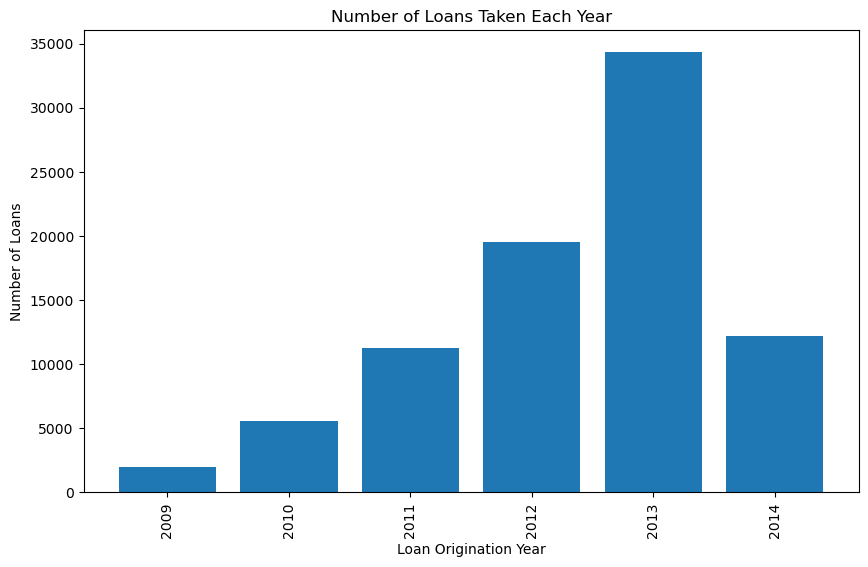

In [40]:

df['LoanOriginationYear'] = df['LoanOriginationDate'].dt.year

# Step 3: Group data and count loans for each year
loan_counts_by_year = df['LoanOriginationYear'].value_counts()

# Step 4: Plot the histogram for each year
plt.figure(figsize=[10, 6])
plt.bar(loan_counts_by_year.index, loan_counts_by_year.values, color=defaultColor)
plt.xlabel('Loan Origination Year')
plt.ylabel('Number of Loans')
plt.title('Number of Loans Taken Each Year')
plt.xticks(rotation=90)
plt.show()

**LoanOriginationYear**: From 2009 till 2013, Prosper Company has steady growth of loan borrowers. As the company name states, the company does Prosper but what happened in 2014 ? Lets find out

In [41]:
df['LoanOriginationDate'].describe()

C:\Users\QXZ31RV\AppData\Local\Temp\ipykernel_13576\4216537690.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['LoanOriginationDate'].describe()


count                   84853
unique                   1165
top       2014-01-22 00:00:00
freq                      491
first     2009-07-20 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object

**Now we know what happened in 2014:** The last loan borrower is dated on 03.12.2014 and still would say on road to steady and prospering year for Prosper Company in refernce to loan borrowers

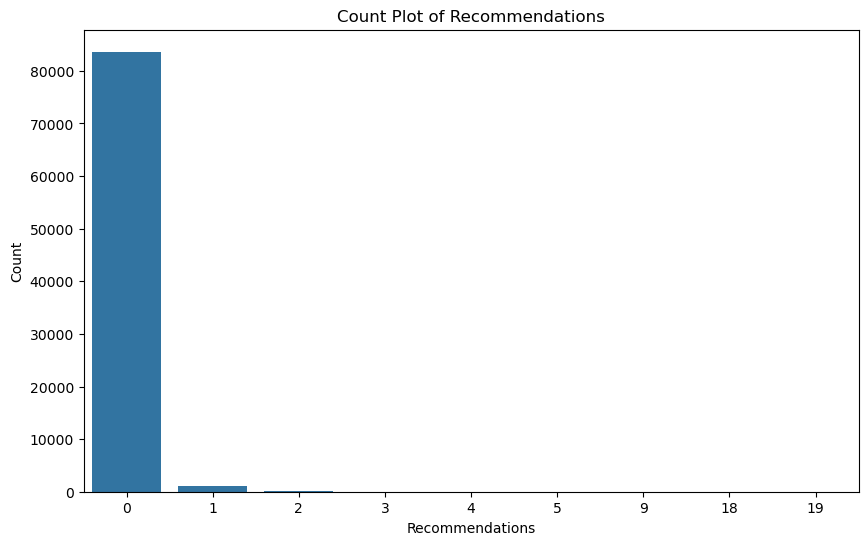

In [42]:
plot_countplot(data=df, x_col='Recommendations', color=defaultColor,
               title='Count Plot of Recommendations', x_label='Recommendations', y_label='Count')

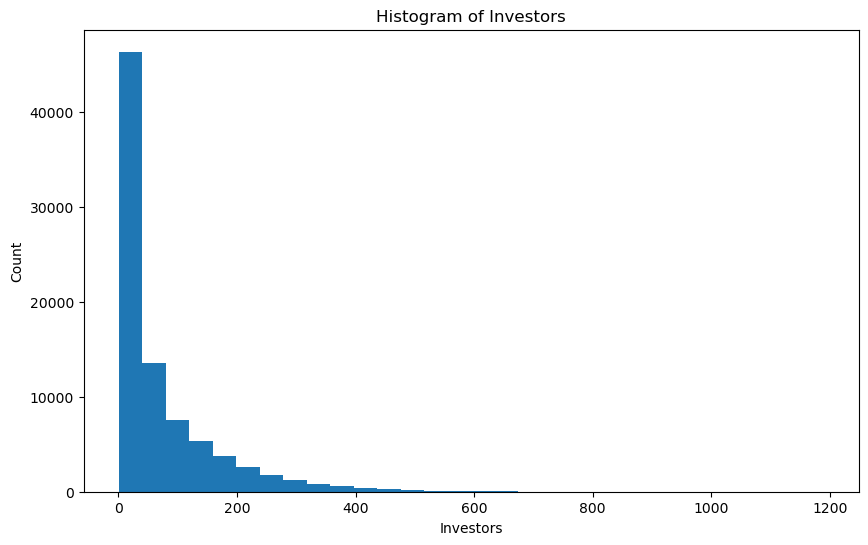

In [43]:
plot_histogram(data=df, column='Investors', bins=30, color=defaultColor,
               title='Histogram of Investors', x_label='Investors', y_label='Count')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I have carried out extensive exploration using plots for the loan data for Prosper Company.
#### Variables of interest
- Loan Term is distributed mostly for 36
- LoanStatus draws attention to the most active loans are current. But for me intresting status are defaulted and completed to define characteristics of a loan fraud. Defaulted status is a minority (good thing)
- BorrowerRate and BorrowerAPR generates mostly similar distribution
- ProsperRating is normally distributed with AA and HR being the least
- Most loan borrowers are employed
- Maximum number of loan borrowers have borrowed upto 15000
- Z-score calculation to find outliers of monthly income

Maximum and Minimum values of the distribution would help us predict the features of a loan categorized as 'Defaulted' or 'Completed'.

#### Unsual Points
- Monthly income is spread over wide range so having many outliers which are identified using z-score and threshold method. Wrangling of these feature is required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**As mentioned in the Udacity classes, wrangling is a iterative process**

- The column containing the categories(numeric) values need cleaning and reducing the number of required categories and we see in the plot there are very few categories of loan borrowers with huge reasons


In [44]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

My focus of interest lies in **'Completed', 'Defaulted', 'Chargedoff'** these three LoanStatus.

In [45]:
#reset the index
df.reset_index(drop=True, inplace=True)

In [46]:
def loanStatus_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

In [47]:
df['LoanStatus'] = df.apply(loanStatus_defaulted, axis=1)

In [48]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Defaulted                  6341
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [49]:
# Create a list of desired 'LoanStatus' values
desired_loan_status = ['Completed', 'Defaulted', 'Chargedoff']

# Filter the DataFrame based on the list of desired values
df = df[df['LoanStatus'].isin(desired_loan_status)]

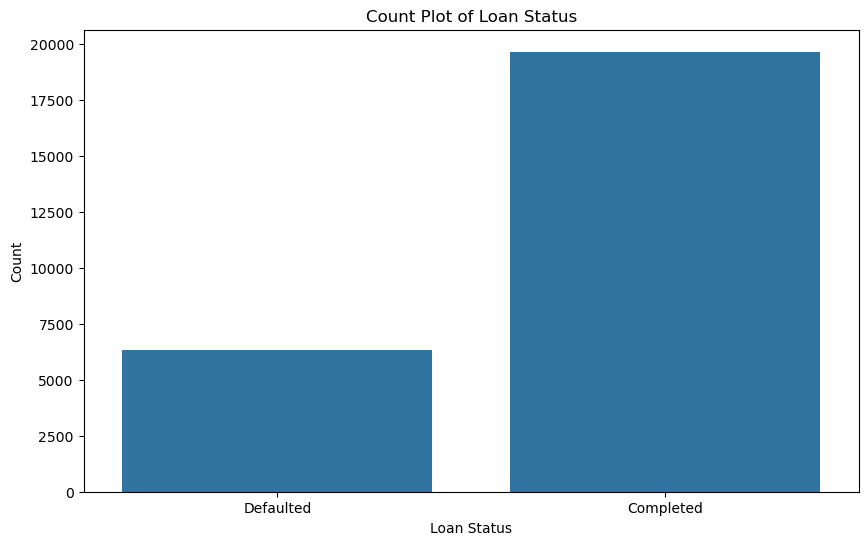

In [50]:
# Call plot_countplot function for LoanStatus
plot_countplot(data=df, x_col='LoanStatus', color=defaultColor,
               title='Count Plot of Loan Status', x_label='Loan Status', y_label='Count')

In [51]:
# Define the categories dictionary
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}

# Replace the numeric values with categories using map
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].map(categories).fillna('Other')


In [52]:
#test
print(df['ListingCategory (numeric)'].unique())

['Other' 'Debt Consolidation' 'Auto' 'Business' 'Home Improvement']


In [53]:
# monthly income, I have identified the outlier and now removing them
df = df[df['StatedMonthlyIncome'] < boundary]

In [54]:
# Drop the 'BorrowerAPR' column from the DataFrame
df.drop('BorrowerAPR', axis=1, inplace=True)

In [55]:
#rename the column
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [56]:
df.shape

(25938, 15)

## Bivariate Exploration

There are two tyoe of data variables in our dataset one is categorical and other is numerical, we fill find relation between the two variable types and also among same variable data types

Plots used in bivariate exploration are as follows
- BoxPlots
- Count Plots
- Voilin Plots

Goal: What influences the credit worthiness of a loan borrower to pay the loan amount in due term to ProsperCompany

In [57]:
def plot_bivariate_countplot(data, x_col, hue_col, palette=None, order=None, title='', x_label='', y_label=''):
    plt.figure(figsize=(10, 6))
    
    if order is not None:
        if isinstance(data[x_col].dtype, pd.CategoricalDtype):
            data[x_col] = pd.Categorical(data[x_col], categories=order, ordered=True)
        else:
            data[x_col] = data[x_col].astype('category', ordered=True, categories=order)
            
    if palette is None:
        palette = 'BuGn_r'
            
    sns.countplot(data=data, x=x_col, hue=hue_col, palette=palette, order=order)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=hue_col, loc='upper left')
    plt.show()

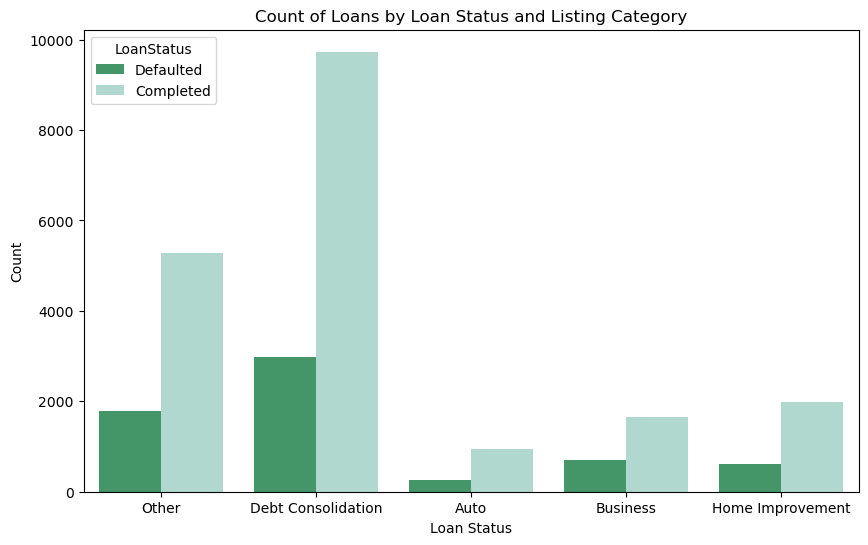

In [58]:
plot_bivariate_countplot(data=df, x_col='ListingCategory', hue_col='LoanStatus', palette='BuGn_r',
                         title='Count of Loans by Loan Status and Listing Category',
                         x_label='Loan Status', y_label='Count')

When comparing completed and defaulted LoanStatus, most common type found out visually are **Business and Home Improvement**.
But standalone defaulted LoanStatus has **Other and Debt Consoslidation** category the most count.

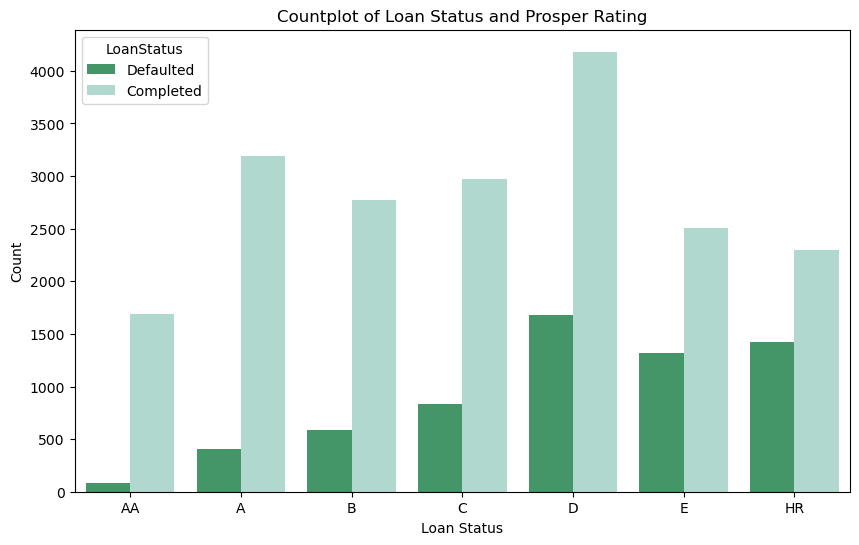

In [59]:
plot_bivariate_countplot(data=df, x_col='ProsperRating (Alpha)', hue_col='LoanStatus', palette='BuGn_r', order=rating_order,
                         title='Countplot of Loan Status and Prosper Rating',
                         x_label='Loan Status', y_label='Count')

Suprisingly, borrowers with ProsperRating **'D'** has more defaulted LoanStatus comapred to 'HR' which is considered worst ProsperRating

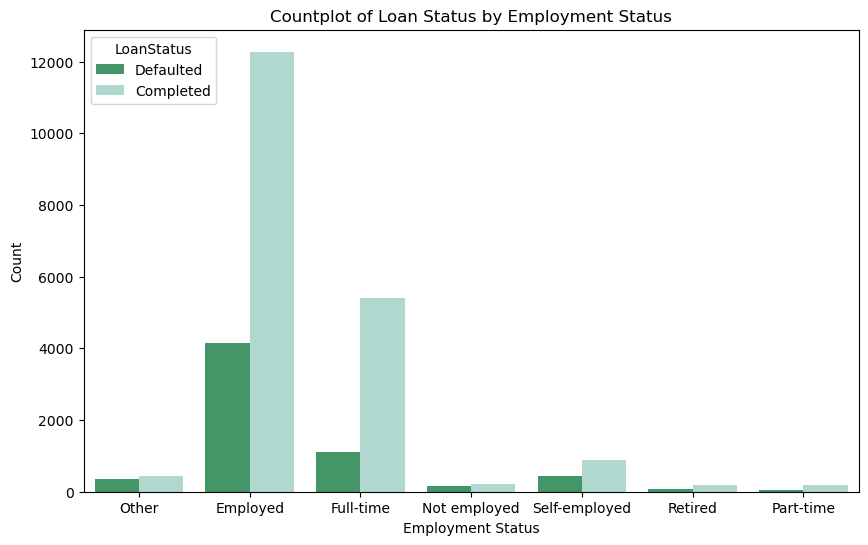

In [60]:
plot_bivariate_countplot(data=df, x_col='EmploymentStatus', hue_col='LoanStatus',
                         title='Countplot of Loan Status by Employment Status',
                         x_label='Employment Status', y_label='Count')

**'Self-Employed' and 'Not Employed'** loan borrower are most with defaulted category compared to completed

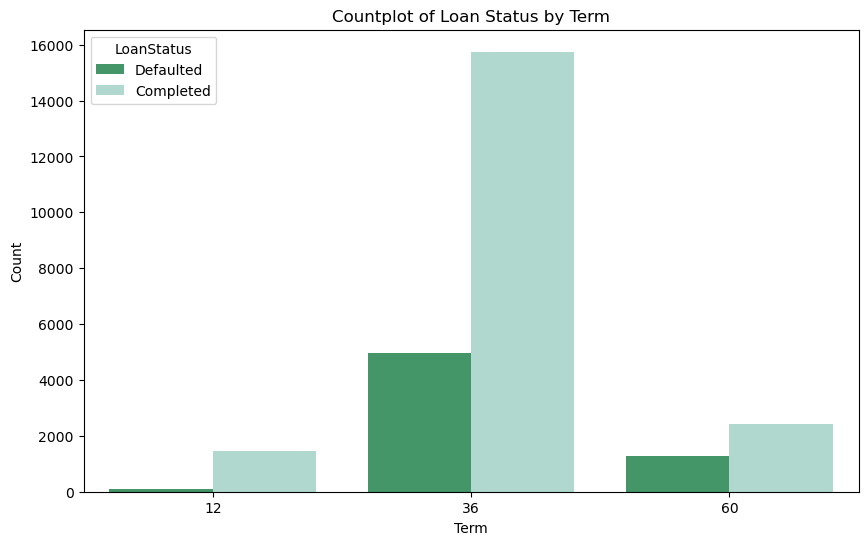

In [61]:
plot_bivariate_countplot(data=df, x_col='Term', hue_col='LoanStatus',
                         title='Countplot of Loan Status by Term',
                         x_label='Term', y_label='Count')

**Term:** of **60** has more proportion of defaulted loan borrowers

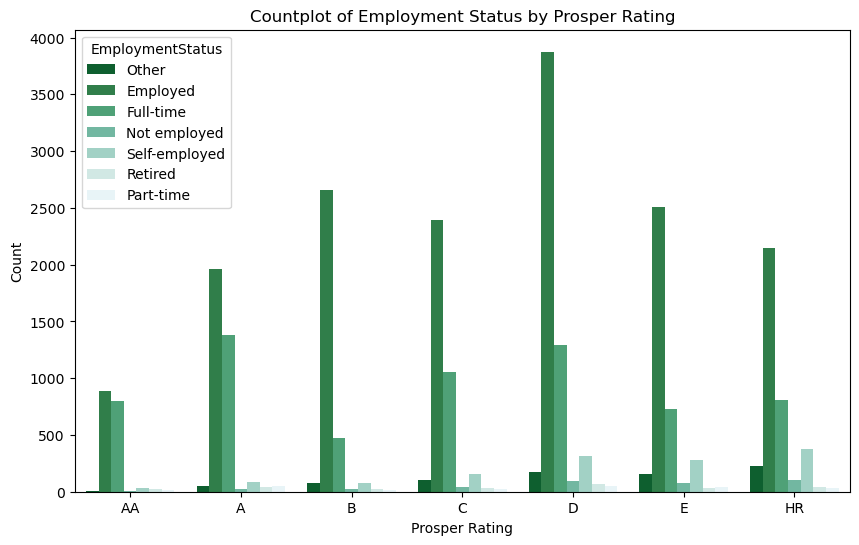

In [62]:
plot_bivariate_countplot(data=df, x_col='ProsperRating (Alpha)', hue_col='EmploymentStatus',
                         title='Countplot of Employment Status by Prosper Rating',
                         x_label='Prosper Rating', y_label='Count')

Frequecy of Self Employed, Not-Emplyoed and Retired Employement status is seen in **HR** and **D** ProsperRating

In [63]:
def plot_violinplot(data, x_col, y_col, color='defaultColor', title='', x_label='', y_label=''):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x=x_col, y=y_col, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

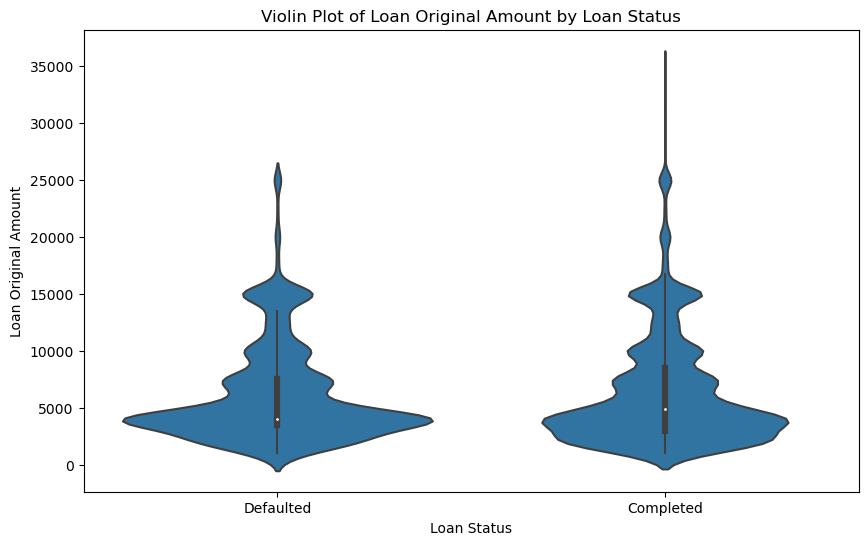

In [64]:
plot_violinplot(data=df, x_col='LoanStatus', y_col='LoanOriginalAmount',
                color=defaultColor,
                title='Violin Plot of Loan Original Amount by Loan Status',
                x_label='Loan Status', y_label='Loan Original Amount')

Most of defaulted loan borrower have amount of **5000**

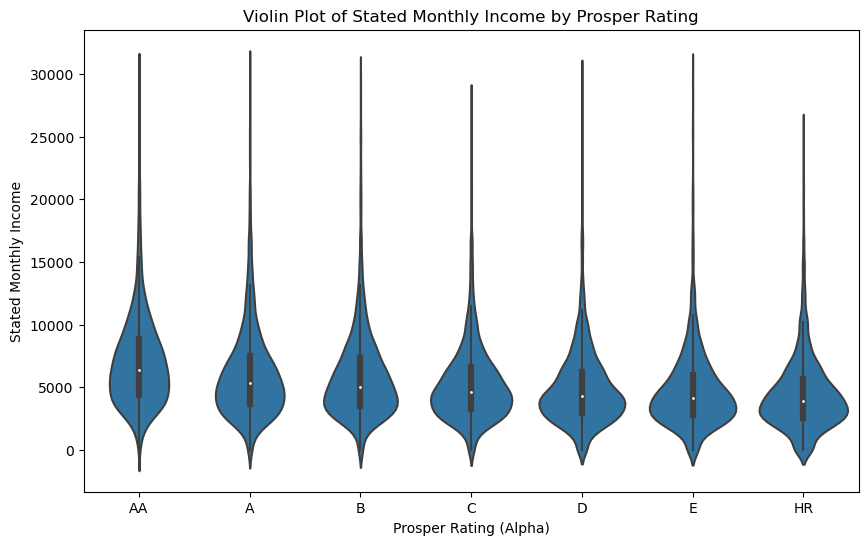

In [65]:
plot_violinplot(data=df, x_col='ProsperRating (Alpha)', y_col='StatedMonthlyIncome',
                color=defaultColor,
                title='Violin Plot of Stated Monthly Income by Prosper Rating',
                x_label='Prosper Rating (Alpha)', y_label='Stated Monthly Income')

Higher monthly income the higher the Prosper Rating

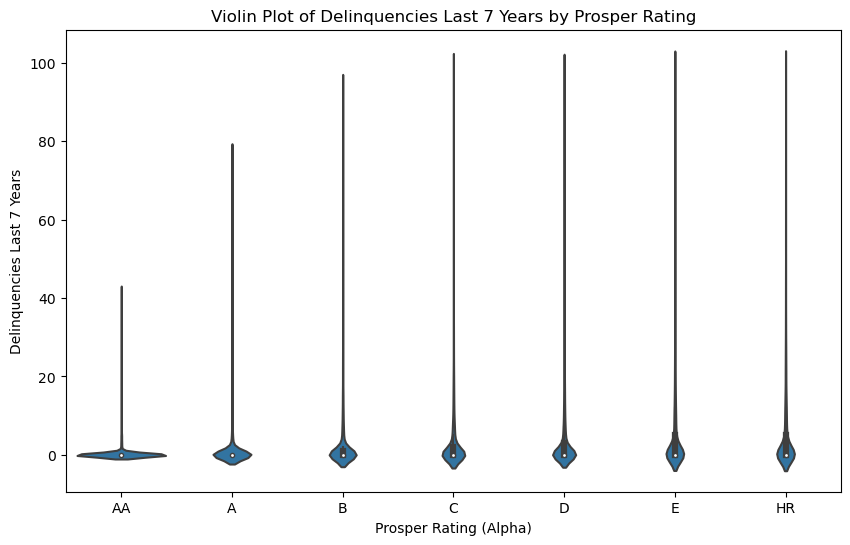

In [66]:
plot_violinplot(data=df, x_col='ProsperRating (Alpha)', y_col='DelinquenciesLast7Years',
                color=defaultColor,
                title='Violin Plot of Delinquencies Last 7 Years by Prosper Rating',
                x_label='Prosper Rating (Alpha)', y_label='Delinquencies Last 7 Years')

High Rated loan borrowers **AA** have less delinquencies

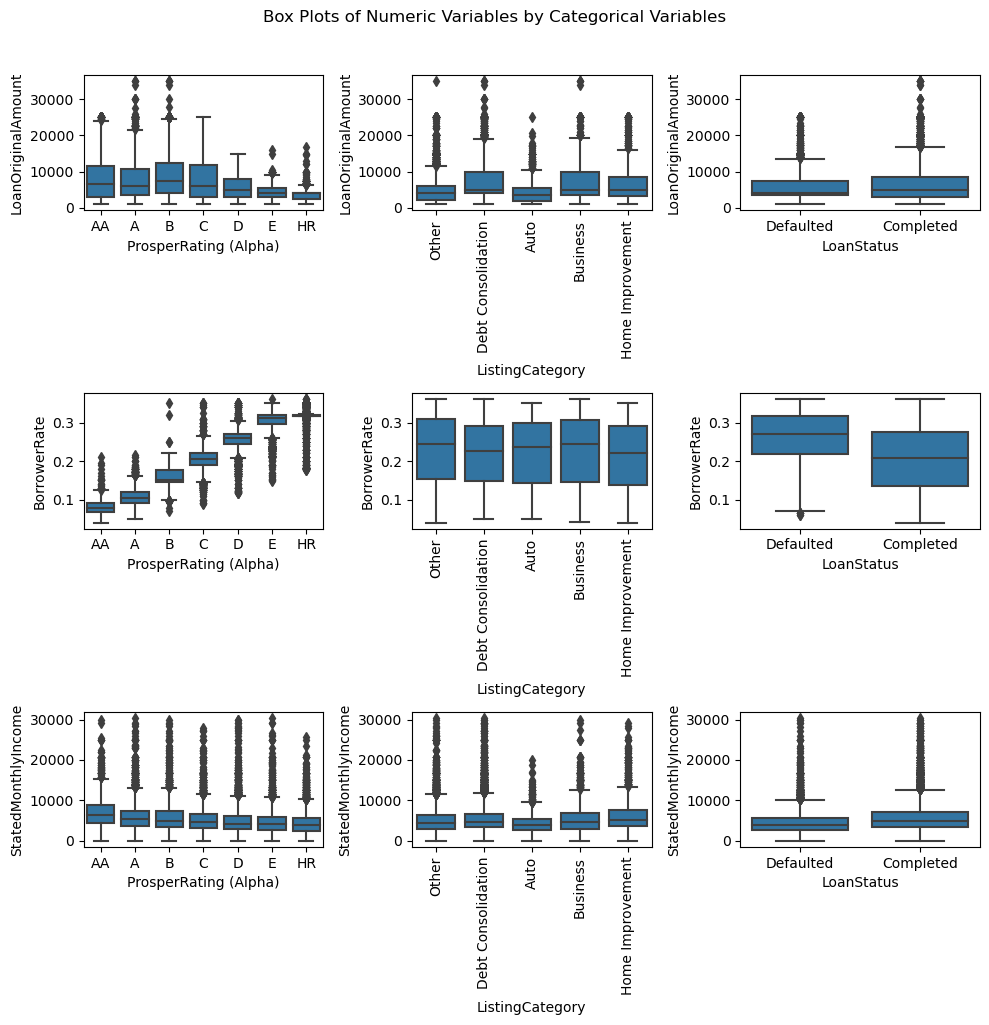

In [67]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate','StatedMonthlyIncome']
categoric_vars = ['ProsperRating (Alpha)', 'ListingCategory', 'LoanStatus']

plt.figure(figsize=[10, 10])

for i in range(len(numeric_vars)):
    for j in range(len(categoric_vars)):
        plt.subplot(len(numeric_vars), len(categoric_vars), i * len(categoric_vars) + j + 1)
        if categoric_vars[j] == 'ListingCategory':
            sns.boxplot(data=df, x=categoric_vars[j], y=numeric_vars[i], color=defaultColor)
            plt.xticks(rotation=90)
        elif categoric_vars[j] == 'ProsperRating (Alpha)':
            sns.boxplot(data=df, x=categoric_vars[j], y=numeric_vars[i], color=defaultColor, order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
        else:
            sns.boxplot(data=df, x=categoric_vars[j], y=numeric_vars[i], color=defaultColor)

plt.suptitle('Box Plots of Numeric Variables by Categorical Variables', y=1.02)
plt.tight_layout()
plt.show()

Borrowers with lower ratings tend to receive lower loan amounts and higher interest rates, and defaulted loans are generally smaller in size compared to completed loans. Additionally, the borrower rate for defaulted loans is considerably higher, which could be attributed to clients with lower ratings getting higher interest rates. Defauleted loan borrowers are normally less monthly income earner compared to completed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Borrowers with lower Prosper Ratings tend to receive lower loan amounts. As the Prosper Rating improves, the loan amount tends to increase. This relationship suggests that borrowers with higher ratings are perceived as less risky and are offered larger loan amount. Simiarly the relationship is seen between BurrrowerRate and Prosper Rating, higher intrest rates for lower prosper rating and vice versa
- Defaulted loans tend to be somewhat smaller than completed loans. This might indicate that borrowers with larger loan amounts are more likely to repay their loans in full
- The borrower rate for defaulted loans is considerably higher than for completed loans
- Long Term loan borrowers have high rate to default
 - Categories like Buisness and other have high frequency to turn to default

Overall, the analysis reveals interesting insights into how various factors like Prosper Rating, Loan Amount, Loan Status, and Loan Purpose are related. The Prosper Rating seems to play a crucial role in determining loan amount and borrower rate.
Prosper Company. Delinquencies for last 7 years and Borrower Rate are good predictors of loan turning to default but both of these are derivatives of ProsperRating

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- 'D' rated loan borrowers are likely to turn to defaulted loan and employement status proportion belonging to 'D' are self-employed, retired or not-emplyoed

## Multivariate Exploration

Exploring Prosper Company loan data I observed Prosper Rating, Loan Amount, Loan Status,ListingCategories and Loan Purpose play a vital role defining the credit worthiness of a loan borrower. Let's deep dive into exploring these using multivariate

This exploration contains the following plots:
- PairPlot
- ViolinPlot
- CatPlot

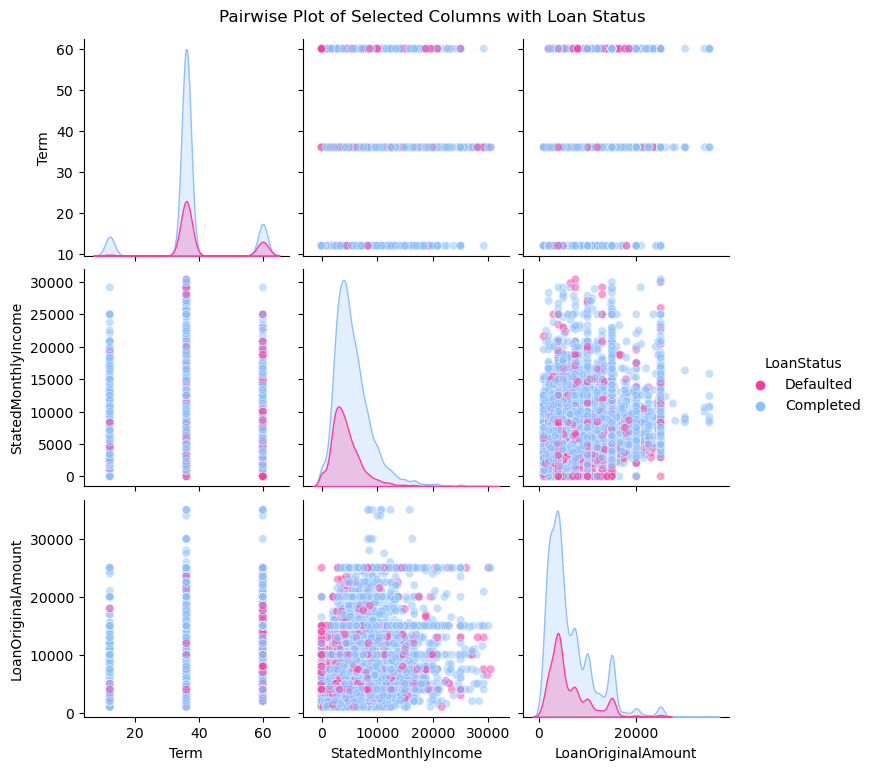

In [68]:
#starting exploration with numeric columns
# extract and visualize the features of interest
cols = [
    'Term', 'StatedMonthlyIncome',
    'LoanOriginalAmount', 'LoanStatus'
       ]
g = sns.pairplot(df[cols], hue='LoanStatus',
                palette={'Defaulted': '#ff3ba0', 'Completed': '#8cc0ff'},
                plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;
plt.suptitle('Pairwise Plot of Selected Columns with Loan Status', y=1.02)

plt.show()

Similar observation of `Delinquencies for last 7 years and Borrower Rate are good predictors of loan turning to default but both of these are derivatives of ProsperRating ` is found from the pairplot

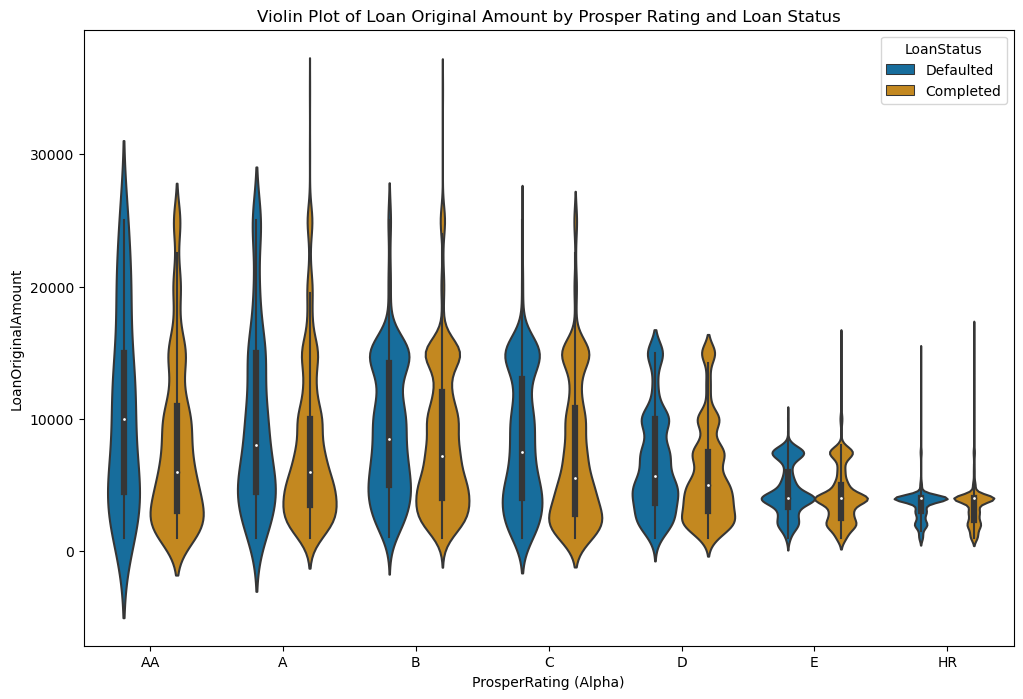

In [69]:
# plot color for colorblind
plt.figure(figsize=[12, 8])
sns.violinplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette='colorblind',order=rating_order)
plt.title('Violin Plot of Loan Original Amount by Prosper Rating and Loan Status')
plt.show()

This is interesting, the defaulted loan is higher in higher ProsperRating than compared to lower categories

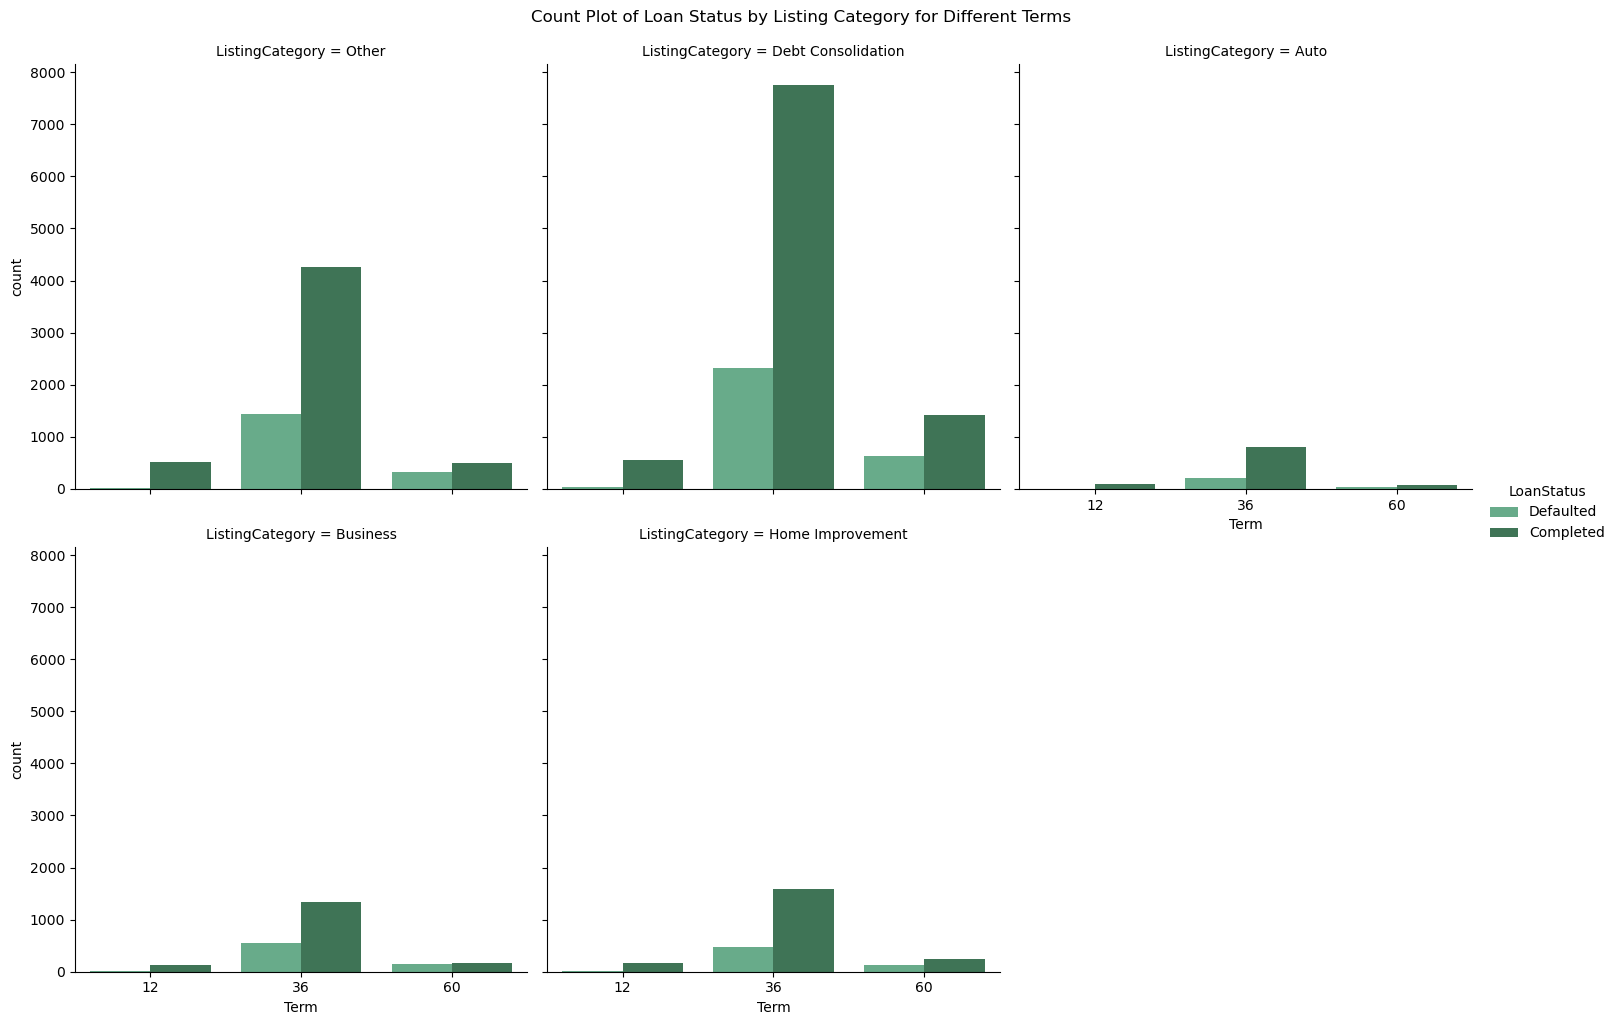

In [70]:
sns.catplot(x='Term', hue='LoanStatus', col='ListingCategory',
              data=df, kind='count', palette='BuGn_d', col_wrap=3
             );
plt.suptitle('Count Plot of Loan Status by Listing Category for Different Terms', y=1.02)
plt.show()

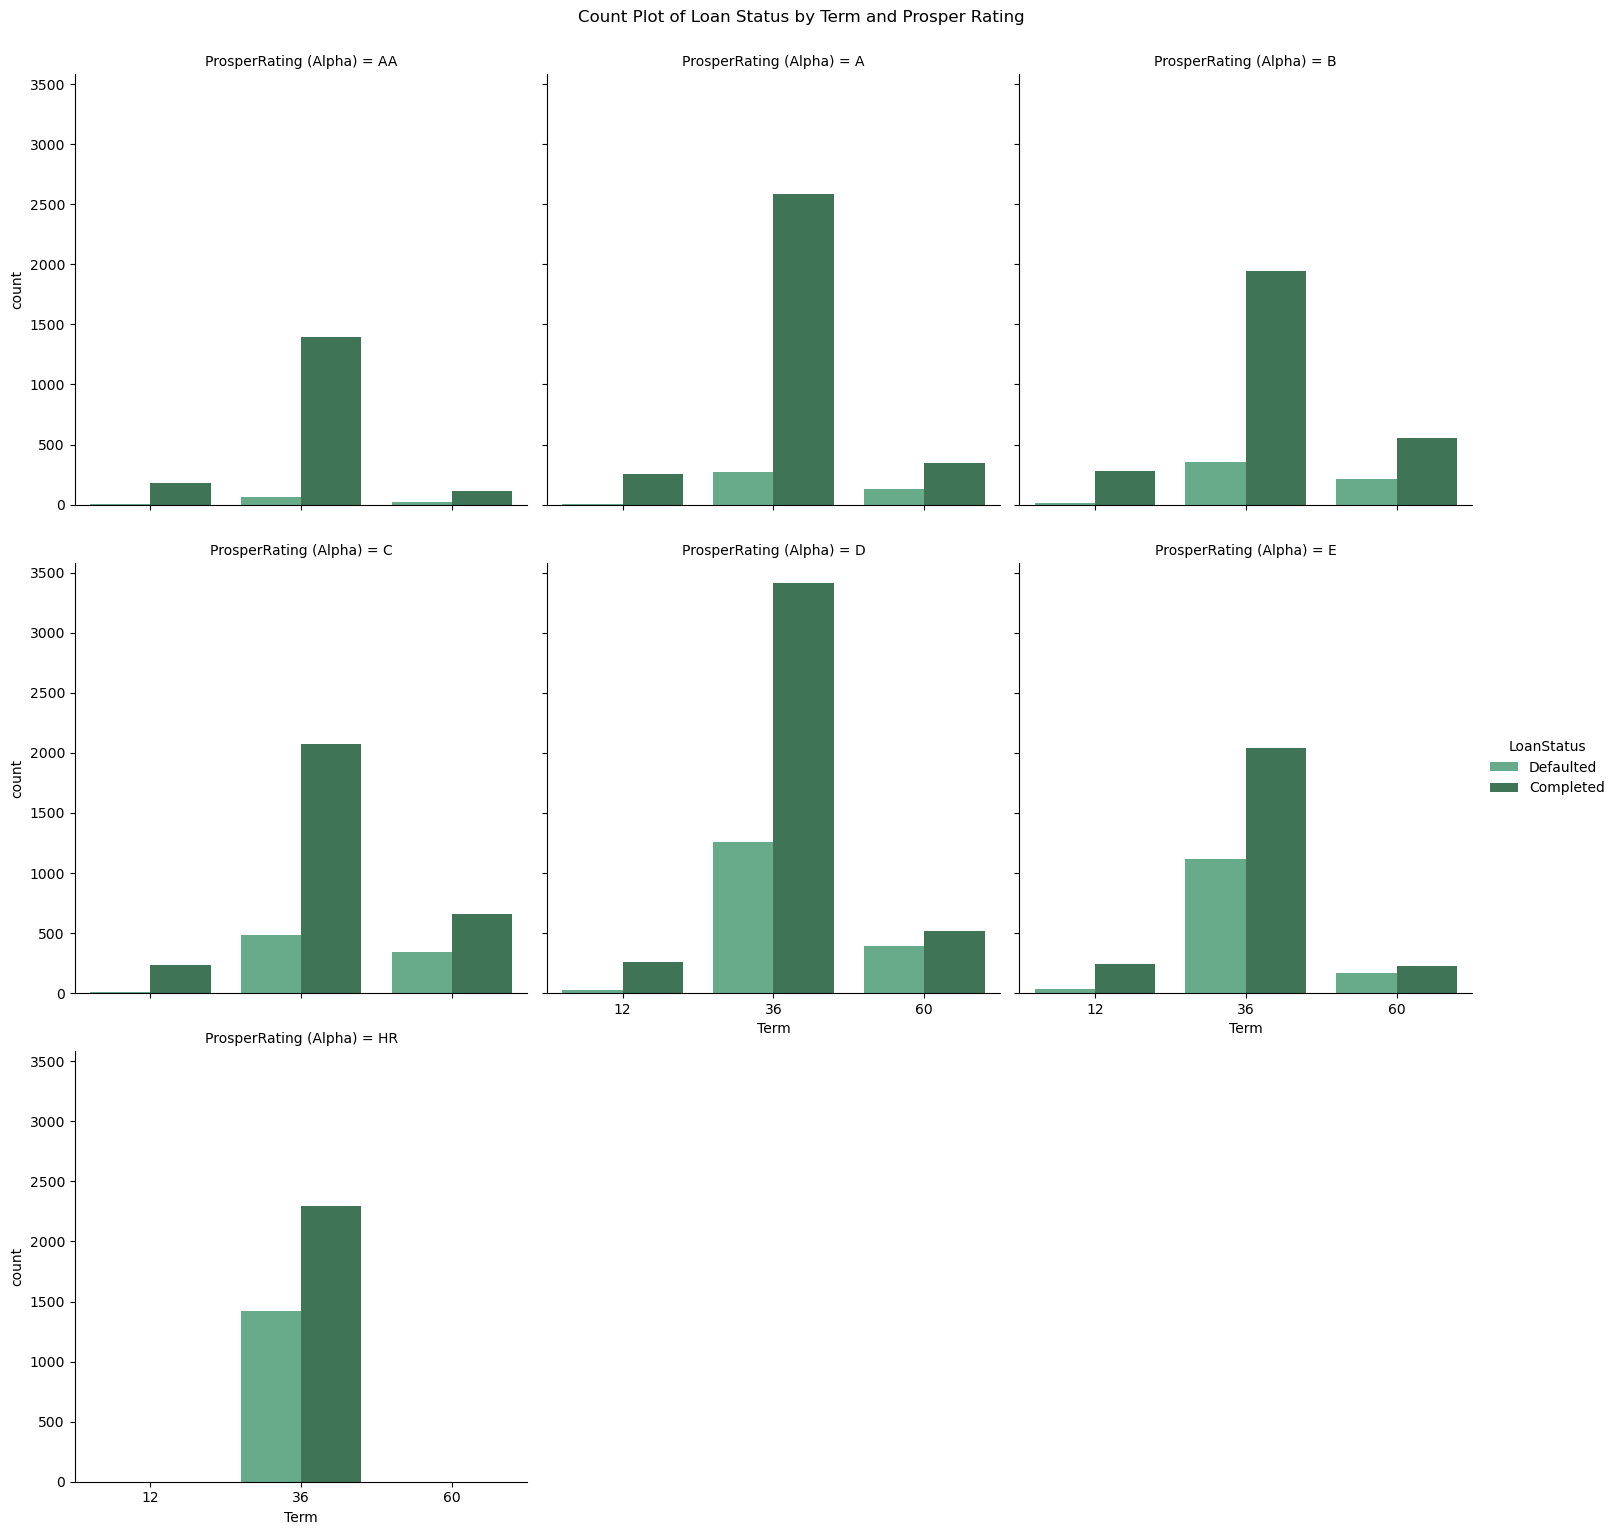

In [71]:
sns.catplot(x='Term', hue='LoanStatus', col='ProsperRating (Alpha)',
              data=df, kind='count', palette='BuGn_d', col_wrap=3
             );
plt.suptitle('Count Plot of Loan Status by Term and Prosper Rating', y=1.02)
plt.show()

Short-term loan borrowers for any categories seems to be safe compared to long-term of 60 Month in categories of Business,Hom Improvement and Others

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### Intial Analysis
- Firstly, ProsperRating plays a role in loan borrowers's credit. Secondly, Term and Employement Status also play a vital role. Amount of credit defaulted is high in higer rating compared to lower ratings
- Categories of loan borrowers prone to default are business, auto and others
- 60 Months Term loan are most to be a default

#### Yes the features have strengthened with bi- and multivariate exploration

### Were there any interesting or surprising interactions between features?

Lowest ProsperRating is `HR` and it has only 36 Month Term of loan, contradicting 60 Month Term of loan.

## Conclusions

#### Steps taken for exploration
- Basic Data Wrangling
- Univariate Exploration
- Data Wrangling after univariate exploration (Wrangling is iterative process)
- Bi Variate and MultiVariate Data Exploration using count plot, box plot, histograms, pie charts, pair plots and many more.

#### Summary

**It is mentioned in the README.md File**
